## Steps Involved in project

*  **Importing important libraries**
*  **EDA(Exploratory Data Analysis)**
*  **Data cleaning & Handling null values**
*  **Label encoding**
*  **Dimension reduction**
*  **One hot encoding**
*  **Model training & testing**
     * Hyperparameter tunning using GridsearchCV
     * Testing
*  **Export tested model to pickle file**
*  **Export location and column information in .json file**
     * .json file useful for later on application(Website building)
       

### Importing important libraries


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df1=pd.read_csv(r'C:\Users\HP\Desktop\Delhi_Home_prices.csv')
df1.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


### EDA(Exploratory Data Analysis)

In [6]:
#Shape of rows and columns
df1.shape 

(1259, 11)

In [7]:
df1['Area'].value_counts().head(10)

900.0     67
1500.0    50
1800.0    48
1000.0    42
1600.0    38
1350.0    35
1100.0    32
1400.0    30
450.0     29
1200.0    28
Name: Area, dtype: int64

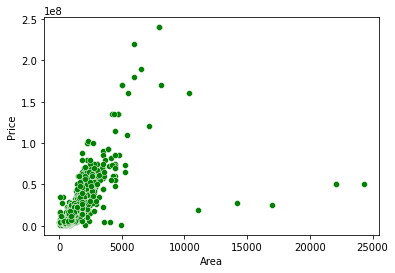

In [8]:
sns.scatterplot(df1["Area"],df1['Price'],color='g')
plt.show()
#Can see a linearity b/w Area and price

In [9]:
df1['BHK'].value_counts()

3     541
2     367
4     220
1      96
5      27
6       6
10      1
7       1
Name: BHK, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='BHK'>

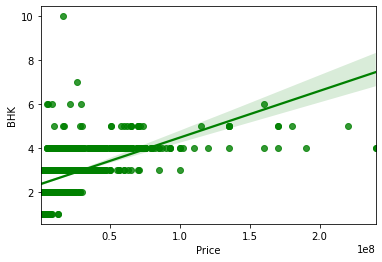

In [10]:
sns.regplot(y='BHK',x='Price',data=df1,color='g')

In [11]:
df1['Bathroom'].value_counts()

2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Bathroom'>

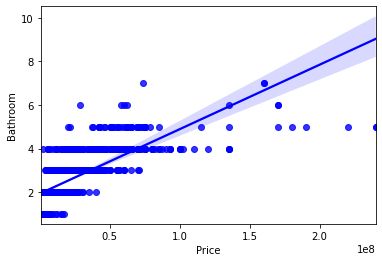

In [12]:
sns.regplot(y='Bathroom',x='Price',data=df1,color='b')

In [13]:
df1['Parking'].value_counts()
#It is unusual to see parking more then 4

1.0      796
2.0      341
3.0       54
4.0       16
39.0       7
5.0        7
114.0      3
10.0       1
9.0        1
Name: Parking, dtype: int64

In [14]:
df1['Furnishing'].value_counts()

Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64

In [15]:
df1.corr() 
#For Correlation b/w different independent variable with dependent variable(price)
#notice that Parking has very low correlation wrt price

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
Area,1.000000,0.449438,0.535104,-0.009297,0.580836,0.162832
BHK,0.449438,1.000000,0.773267,-0.070707,0.571523,0.181540
Bathroom,0.535104,0.773267,1.000000,-0.032796,0.728108,0.219169
Parking,-0.009297,-0.070707,-0.032796,1.000000,-0.000448,0.001607
Price,0.580836,0.571523,0.728108,-0.000448,1.000000,0.322859
Per_Sqft,0.162832,0.181540,0.219169,0.001607,0.322859,1.000000


In [16]:
df1['Locality'].value_counts()

Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  34
Lajpat Nagar 2                                                                                                                                                                                                                                                                                                       

### Data cleaning & Handling null values

In [17]:
df2=df1.drop(['Type','Status'],axis='columns')
df2.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Transaction,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,New_Property,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,New_Property,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Resale,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Resale,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,New_Property,6667.0


In [18]:
#Checking for Null values in columns with Count
df2.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Transaction      0
Per_Sqft       241
dtype: int64

In [19]:
#Filling NA values of Per_sqft
df2['Per_Sqft']=df2['Per_Sqft'].fillna(value=df2['Price']/df2['Area'] )


In [20]:
df2.isnull().sum()

Area            0
BHK             0
Bathroom        2
Furnishing      5
Locality        0
Parking        33
Price           0
Transaction     0
Per_Sqft        0
dtype: int64

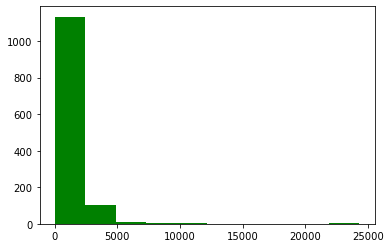

In [21]:
#Checking For the Count of Area
plt.hist(df2["Area"],color='green')
plt.show()

##### On observing we can see area below 3000 where maximum value lies, so just keep it.

In [22]:
df2=df2[df2['Area']<=3000]

<AxesSubplot:xlabel='Price', ylabel='Area'>

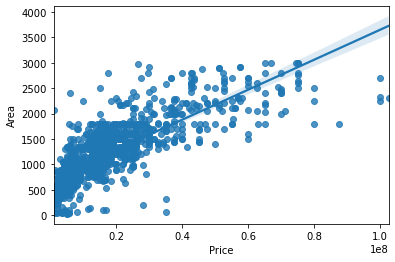

In [23]:
#New area within range of under 3000
sns.regplot(y='Area',x='Price',data=df2)

In [24]:
df2[df2['Bathroom'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Transaction,Per_Sqft
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Resale,9000.0
120,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Resale,9000.0


In [25]:
df2['Bathroom'].mode()[0]

2.0

In [26]:
#Filling NA values for Bathroom and Furnishing.
df2['Bathroom']=df2['Bathroom'].fillna(value=df2['Bathroom'].mode()[0])
df2['Furnishing'] = df2['Furnishing'].fillna(method='bfill')

In [27]:
df2.isnull().sum()

Area            0
BHK             0
Bathroom        0
Furnishing      0
Locality        0
Parking        32
Price           0
Transaction     0
Per_Sqft        0
dtype: int64

In [28]:
#Filtering out Bathroom and BHK Column
#Above it generally outliers
df2 = df2[df2['Bathroom']<6]
df2 = df2[df2['BHK']<6]

In [29]:
#Much filtered out data set
df2.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Transaction,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,New_Property,8125.0
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,New_Property,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Resale,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Resale,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,New_Property,6667.0


In [30]:
df2.corr()['Price']

Area        0.796127
BHK         0.594771
Bathroom    0.742601
Parking    -0.020703
Price       1.000000
Per_Sqft    0.293040
Name: Price, dtype: float64

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 0 to 1257
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1181 non-null   float64
 1   BHK          1181 non-null   int64  
 2   Bathroom     1181 non-null   float64
 3   Furnishing   1181 non-null   object 
 4   Locality     1181 non-null   object 
 5   Parking      1149 non-null   float64
 6   Price        1181 non-null   int64  
 7   Transaction  1181 non-null   object 
 8   Per_Sqft     1181 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 92.3+ KB


In [32]:
# Converting Bathroom from Float64 to int64
df2 = df2.astype({"Bathroom":'int64'}) 

#### Now as values of Furnishing and Transaction are in text so we convert it into numeric(by label encoding), Then have correlation with price.


### Label encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
furnishing_encoder = LabelEncoder()
transaction_encoder = LabelEncoder()

In [35]:
df2['Furnishing'] = furnishing_encoder.fit_transform(df2['Furnishing'].astype('str'))
df2['Transaction'] = transaction_encoder.fit_transform(df2['Transaction'])

In [36]:
df2.corr()['Price']

Area           0.796127
BHK            0.594771
Bathroom       0.742601
Furnishing    -0.029147
Parking       -0.020703
Price          1.000000
Transaction   -0.182385
Per_Sqft       0.293040
Name: Price, dtype: float64

##### As we can see in above correlation Furnishing and Parking don't show much impact on perdicting price.

<AxesSubplot:xlabel='Parking', ylabel='Price'>

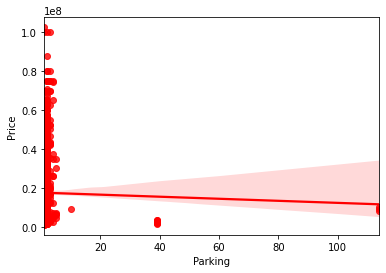

In [37]:
#Plot for Parking and price, Generally we don't see more then 3 parking
sns.regplot(x="Parking",y="Price",data=df2,color='r')

In [38]:
# From graph and correlation it is clear Parking and Furnishing don't impact much. So just drop it.
df3= df2.drop(columns=['Parking','Furnishing'],axis='columns')

In [39]:
df3['Price']=df2['Price']/100000 #Convert in lakhs
df3.head()

,Area,BHK,Bathroom,Locality,Price,Transaction,Per_Sqft
0,800.0,3,2,Rohini Sector 25,65.0,0,8125.0
1,750.0,2,2,"J R Designers Floors, Rohini Sector 24",50.0,0,6667.0
2,950.0,2,2,"Citizen Apartment, Rohini Sector 13",155.0,1,6667.0
3,600.0,2,2,Rohini Sector 24,42.0,1,6667.0
4,650.0,2,2,Rohini Sector 24 carpet area 650 sqft status R...,62.0,0,6667.0


## Dimension Reduction

In [40]:
len(df3.Locality.unique())

357

In [41]:
Locality_new = df3['Locality'].value_counts(ascending=False)
Locality_new

Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  34
Lajpat Nagar 2                                                                                                                                                                                                                                                                                                       

In [42]:
len(Locality_new)

357

In [43]:
#Checking for Location having value count less then 2
len(Locality_new[Locality_new<2])

191

In [44]:
Locality_less_than_2 = Locality_new[Locality_new<2]
len(Locality_less_than_2)

191

In [45]:
# Location with count only 1 will be specified as 'others' catergory.
df3.Locality=df3.Locality.apply(lambda x: 'others' if x in Locality_less_than_2 else x)
len(df3.Locality.unique())

167

### One hot encoding

In [46]:
df4 = df3.copy()

In [47]:
dummies = pd.get_dummies(df4.Locality)
dummies.head()

,"APL Builder Floor, Greater Kailash 1","Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla","Adarsh Homes, Dwarka Mor",Alaknanda,"Amar Colony, Lajpat Nagar","Andheria Mor, Mehrauli","Aravali Apartments, Alaknanda",...,Vasant Kunj,Vasant Kunj Sector C,"Vasant Vihar Builder Floor, Vasant Vihar",Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Virat Residency, Dwarka Mor","Yamuna Apartment, Alaknanda","Yamuna Vihar, Shahdara",others
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df4=pd.concat([df4,dummies],axis='columns')
df4.head()

,Area,BHK,Bathroom,Locality,Price,Transaction,Per_Sqft,"APL Builder Floor, Greater Kailash 1","Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave",...,Vasant Kunj,Vasant Kunj Sector C,"Vasant Vihar Builder Floor, Vasant Vihar",Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Virat Residency, Dwarka Mor","Yamuna Apartment, Alaknanda","Yamuna Vihar, Shahdara",others
0,800.0,3,2,Rohini Sector 25,65.0,0,8125.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,750.0,2,2,"J R Designers Floors, Rohini Sector 24",50.0,0,6667.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,950.0,2,2,others,155.0,1,6667.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,600.0,2,2,Rohini Sector 24,42.0,1,6667.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,650.0,2,2,others,62.0,0,6667.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
df4 = df4.drop('Locality',axis='columns')
df4.head(4)

,Area,BHK,Bathroom,Price,Transaction,Per_Sqft,"APL Builder Floor, Greater Kailash 1","Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla",...,Vasant Kunj,Vasant Kunj Sector C,"Vasant Vihar Builder Floor, Vasant Vihar",Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Virat Residency, Dwarka Mor","Yamuna Apartment, Alaknanda","Yamuna Vihar, Shahdara",others
0,800.0,3,2,65.0,0,8125.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,750.0,2,2,50.0,0,6667.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,950.0,2,2,155.0,1,6667.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,600.0,2,2,42.0,1,6667.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df4.head()

,Area,BHK,Bathroom,Price,Transaction,Per_Sqft,"APL Builder Floor, Greater Kailash 1","Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla",...,Vasant Kunj,Vasant Kunj Sector C,"Vasant Vihar Builder Floor, Vasant Vihar",Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Virat Residency, Dwarka Mor","Yamuna Apartment, Alaknanda","Yamuna Vihar, Shahdara",others
0,800.0,3,2,65.0,0,8125.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,750.0,2,2,50.0,0,6667.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,950.0,2,2,155.0,1,6667.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,600.0,2,2,42.0,1,6667.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,650.0,2,2,62.0,0,6667.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
df4= df4.drop(columns=['Per_Sqft'],axis='columns')

In [52]:
df4.shape

(1181, 172)

In [53]:
X = df4.drop('Price',axis='columns')
X.shape

(1181, 171)

In [54]:
y = df4.Price
y.head(3)

0     65.0
1     50.0
2    155.0
Name: Price, dtype: float64

### Model training & testing

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 20) 

In [56]:
from sklearn.linear_model import LinearRegression
linear_r =LinearRegression()
linear_r.fit(X_train,y_train)
linear_r.score(X_test,y_test)

0.7780002694724877

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.7577684183149802

## Hyperparameter tunning using GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def best_model(x,y):
    models = {
    'random_forest':{
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators':[10,100,200]
            
        }
    },
        'Lasso' : {
            'model' : Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params':{
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }        
        }

    }
    scores =[]
    cv=ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_score' : gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_model(X,y)

,model,best_score,best_params
0,random_forest,0.794629,{'n_estimators': 100}
1,Lasso,0.706775,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.691504,"{'criterion': 'mse', 'splitter': 'random'}"


In [59]:
def predict_price(Locality,Area,BHK,Bathroom,Transaction):
    loc_index = np.where(X.columns==Locality)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = Area
    x[1] = BHK
    x[2] = Bathroom
    x[3] = Transaction
    
    if loc_index >= 0:
        x[loc_index] = 1

    return rf.predict([x])[0]

In [60]:
x = np.zeros(len(X.columns))
x.shape

(171,)

In [61]:
X.shape

(1181, 171)

In [62]:
type([x][0])

numpy.ndarray

In [63]:
predict_price('Rohini Sector 25',900, 3, 2,0)
# That's predicting pretty decent

65.14666666666668

In [64]:
predict_price('Lajpat Nagar 3',1450,2,2,0)

298.19142857142856

In [65]:
predict_price('Lajpat Nagar 1',800, 1, 1, 0)

92.00666666666667

###  Export tested model to pickle file

In [66]:
import pickle
with open('DHPP_pickle.pickle','wb') as f:
    pickle.dump(rf,f)

### Export location and column information in .json file

In [67]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("DHPP_columns.json","w") as f:
    f.write(json.dumps(columns))